<a href="https://colab.research.google.com/github/pwirap/Final-Project-Task-Rakamin-x-Home-Credit-Data-Scientist/blob/main/Final_Project_Task_Rakamin_x_Home_Credit_Data_Scientist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from scipy import stats

from datetime import datetime

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

# Load and Understanding

In [2]:
application_test = pd.read_csv("application_test.csv")
application_train = pd.read_csv("application_train.csv")

**Data Selection**

In [3]:
application_test_fix = application_test[['SK_ID_CURR','NAME_CONTRACT_TYPE','AMT_CREDIT','AMT_ANNUITY','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_HOUSING_TYPE','CNT_FAM_MEMBERS','NAME_FAMILY_STATUS','NAME_INCOME_TYPE','OCCUPATION_TYPE','AMT_INCOME_TOTAL','NAME_EDUCATION_TYPE','DAYS_BIRTH','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']]
application_train_fix = application_train[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','AMT_CREDIT','AMT_ANNUITY','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_HOUSING_TYPE','CNT_FAM_MEMBERS','NAME_FAMILY_STATUS','NAME_INCOME_TYPE','OCCUPATION_TYPE','AMT_INCOME_TOTAL','NAME_EDUCATION_TYPE','DAYS_BIRTH','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']]

**Checking for Null Values, Data Types, Value in every Columns and Unique Value in ID**

In [4]:
pd.set_option('display.max_columns', None)
application_train_fix.sample(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,AMT_CREDIT,AMT_ANNUITY,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,NAME_FAMILY_STATUS,NAME_INCOME_TYPE,OCCUPATION_TYPE,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
536,100620,0,Cash loans,1800000.0,49500.0,F,N,Y,House / apartment,2.0,Married,Commercial associate,High skill tech staff,225000.0,Secondary / secondary special,-17388,0.0,0.0
196808,328194,0,Cash loans,314100.0,16573.5,M,Y,Y,House / apartment,1.0,Single / not married,Working,Drivers,126000.0,Secondary / secondary special,-10063,2.0,2.0
254717,394747,0,Cash loans,405000.0,24601.5,F,N,Y,House / apartment,1.0,Single / not married,Commercial associate,Laborers,202500.0,Higher education,-9059,0.0,0.0
80932,193837,0,Cash loans,414229.5,20146.5,M,N,Y,House / apartment,4.0,Married,Working,Drivers,144000.0,Secondary / secondary special,-10824,0.0,0.0
191880,322499,0,Cash loans,746280.0,54436.5,F,N,Y,House / apartment,1.0,Widow,Commercial associate,Laborers,247500.0,Secondary / secondary special,-19402,0.0,0.0
179644,308175,0,Cash loans,1288350.0,37800.0,M,Y,Y,House / apartment,2.0,Married,Pensioner,NaN,90000.0,Secondary / secondary special,-22188,0.0,0.0
283066,427858,0,Cash loans,391090.5,21213.0,F,N,N,House / apartment,2.0,Separated,Commercial associate,NaN,202500.0,Higher education,-13101,0.0,0.0
203642,336088,0,Cash loans,127350.0,12726.0,F,N,Y,House / apartment,4.0,Civil marriage,Working,Sales staff,157500.0,Higher education,-13340,0.0,0.0
221828,356971,0,Cash loans,254700.0,30357.0,M,N,Y,House / apartment,2.0,Married,Pensioner,NaN,121500.0,Secondary / secondary special,-23629,0.0,0.0
253363,393179,1,Cash loans,1800000.0,47484.0,F,N,N,House / apartment,2.0,Married,Working,Sales staff,315000.0,Secondary / secondary special,-18876,0.0,0.0


In [5]:
application_train_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296917 entries, 0 to 296916
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SK_ID_CURR                296917 non-null  int64  
 1   TARGET                    296917 non-null  int64  
 2   NAME_CONTRACT_TYPE        296917 non-null  object 
 3   AMT_CREDIT                296917 non-null  float64
 4   AMT_ANNUITY               296905 non-null  float64
 5   CODE_GENDER               296917 non-null  object 
 6   FLAG_OWN_CAR              296917 non-null  object 
 7   FLAG_OWN_REALTY           296917 non-null  object 
 8   NAME_HOUSING_TYPE         296917 non-null  object 
 9   CNT_FAM_MEMBERS           296915 non-null  float64
 10  NAME_FAMILY_STATUS        296917 non-null  object 
 11  NAME_INCOME_TYPE          296917 non-null  object 
 12  OCCUPATION_TYPE           203962 non-null  object 
 13  AMT_INCOME_TOTAL          296917 non-null  f

In [6]:
x = application_train_fix["SK_ID_CURR"].value_counts()
print(x[x > 1])

Series([], Name: SK_ID_CURR, dtype: int64)


In [65]:
x_trial = application_train_fix.groupby(['TARGET']).agg({
    'AMT_CREDIT': 'sum',
}).reset_index()
x_trial.columns = ['TARGET', 'sum_credit']

In [66]:
x_trial

,TARGET,sum_credit
0,0,1.645097e+11
1,1,1.339918e+10


**Checking for Data Duplicates**

In [7]:
application_train_fix.duplicated().sum()

0

In [8]:
test_value = application_train_fix.copy()

In [9]:
test_value.drop(columns=['SK_ID_CURR'], inplace=True)

In [10]:
for col in test_value:
    unique_values = test_value[col].unique()
    print('Column:', col)
    print('Unique values:', list(unique_values))
    print()

Column: TARGET
Unique values: [1, 0]

Column: NAME_CONTRACT_TYPE
Unique values: ['Cash loans', 'Revolving loans']

Column: AMT_CREDIT
Unique values: [406597.5, 1293502.5, 135000.0, 312682.5, 513000.0, 490495.5, 1560726.0, 1530000.0, 1019610.0, 405000.0, 652500.0, 148365.0, 80865.0, 918468.0, 773680.5, 299772.0, 509602.5, 270000.0, 157500.0, 544491.0, 427500.0, 1132573.5, 497520.0, 239850.0, 247500.0, 225000.0, 979992.0, 327024.0, 790830.0, 180000.0, 665892.0, 512064.0, 199008.0, 733315.5, 1125000.0, 450000.0, 641173.5, 454500.0, 247275.0, 540000.0, 1193580.0, 604152.0, 288873.0, 746280.0, 661702.5, 305221.5, 260640.0, 1350000.0, 1506816.0, 675000.0, 314055.0, 837427.5, 298728.0, 640458.0, 1227901.5, 1663987.5, 1080000.0, 1130760.0, 95940.0, 315000.0, 1256400.0, 1035000.0, 573628.5, 495351.0, 755190.0, 1288350.0, 337761.0, 585000.0, 113760.0, 252000.0, 760225.5, 796396.5, 343377.0, 547344.0, 545040.0, 373140.0, 862560.0, 953460.0, 284400.0, 900000.0, 781920.0, 787131.0, 808650.0, 448272

Summary :

1. There are some null values in the OCCUPATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
2. The SK_ID_CURR feature should be converted to a object data type.

# Data Cleaning & Data Preprocessing

**1. Handling Type Data**

In [11]:
df_clean = application_train_fix.copy()

In [12]:
df_clean["SK_ID_CURR"] = df_clean["SK_ID_CURR"].astype(str)

**2. Handling Missing Value**

In [13]:
df_clean.dropna(inplace=True)

# Data Preprocessing

**1. Feature Engineering**

In [14]:
df_datapro = df_clean.copy()

In [15]:
df_datapro["YEARS"] = round(df_datapro["DAYS_BIRTH"] / (-365))
df_datapro["TOTAL_LATE_PAYMENT_SOCIAL_CIRCLE"] = df_datapro["DEF_30_CNT_SOCIAL_CIRCLE"] + df_datapro["DEF_60_CNT_SOCIAL_CIRCLE"]
df_datapro.drop(columns=['DAYS_BIRTH','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'], inplace=True)

In [16]:
df_datapro["FLAG_TARGET"] = df_datapro["TARGET"].apply(lambda x: "Late" if x == 1 else "no_late")

# EDA

In [17]:
df_eda = df_datapro.copy()

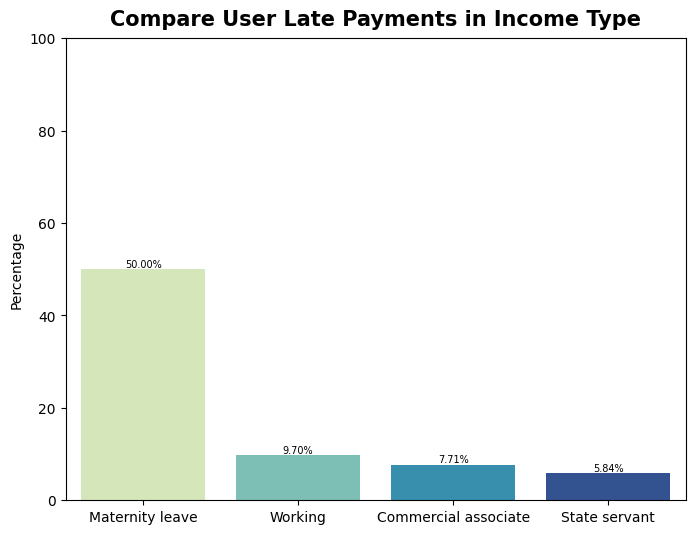

In [18]:
df_group = df_eda.groupby('NAME_INCOME_TYPE').size().reset_index(name='Total')
df_group1=df_eda.groupby(['NAME_INCOME_TYPE','FLAG_TARGET']).size().reset_index(name='Jumlah')
df_gab = df_group1.merge(df_group, on='NAME_INCOME_TYPE', how='left')
df_gab['Rasio']= round((df_gab['Jumlah']/df_gab['Total'])*100, 2)

df_gab = df_gab[df_gab['FLAG_TARGET'] == "Late"]
df_gab = df_gab.sort_values(by='Rasio', ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab, x='NAME_INCOME_TYPE', y='Rasio', palette='YlGnBu')
plt.title('Compare User Late Payments in Income Type', fontsize=15, weight='bold', y=1.01)
plt.ylim(0,100)
plt.xticks(rotation=0, fontsize=10)
plt.xlabel("",fontsize=10)
plt.ylabel("Percentage",fontsize=10)

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=7, color='black')

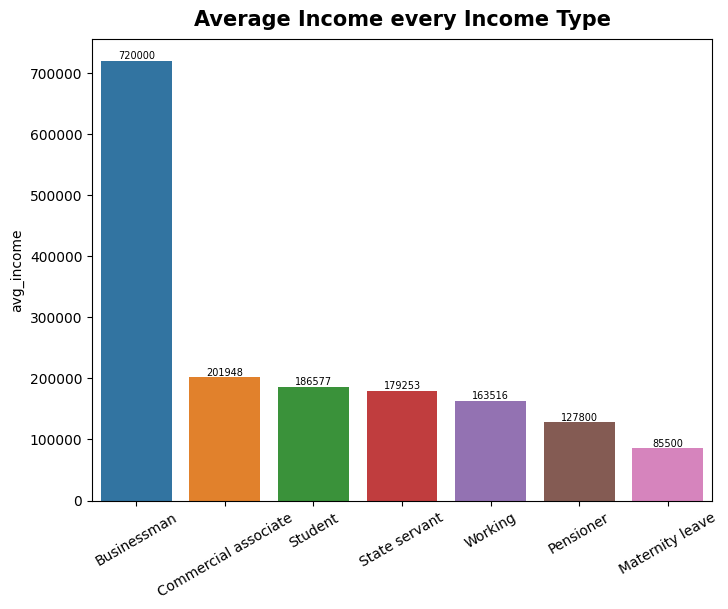

In [19]:
df_eda_group = df_eda.groupby(['NAME_INCOME_TYPE']).agg({
    'AMT_INCOME_TOTAL': 'mean',
}).reset_index()
df_eda_group.columns = ['NAME_INCOME_TYPE', 'avg_income']
df_eda_group = df_eda_group.sort_values(by='avg_income', ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_eda_group, x='NAME_INCOME_TYPE', y='avg_income')
plt.title('Average Income every Income Type', fontsize=15, weight='bold', y=1.01)
plt.xticks(rotation=30, fontsize=10)
plt.xlabel("",fontsize=10)
plt.ylabel("avg_income",fontsize=10)

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=7, color='black')

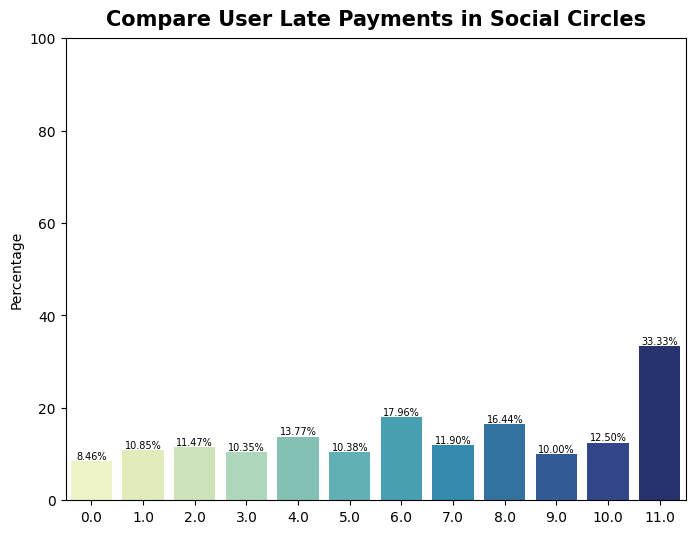

In [20]:
df_group = df_eda.groupby('TOTAL_LATE_PAYMENT_SOCIAL_CIRCLE').size().reset_index(name='Total')
df_group1=df_eda.groupby(['TOTAL_LATE_PAYMENT_SOCIAL_CIRCLE','FLAG_TARGET']).size().reset_index(name='Jumlah')
df_gab = df_group1.merge(df_group, on='TOTAL_LATE_PAYMENT_SOCIAL_CIRCLE', how='left')
df_gab['Rasio']= round((df_gab['Jumlah']/df_gab['Total'])*100, 2)

df_gab = df_gab[df_gab['FLAG_TARGET'] == "Late"]
df_gab = df_gab.sort_values(by='Rasio', ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_gab, x='TOTAL_LATE_PAYMENT_SOCIAL_CIRCLE', y='Rasio', palette='YlGnBu')
plt.title('Compare User Late Payments in Social Circles', fontsize=15, weight='bold', y=1.01)
plt.ylim(0,100)
plt.xticks(rotation=0, fontsize=10)
plt.xlabel("",fontsize=10)
plt.ylabel("Percentage",fontsize=10)

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=7, color='black')

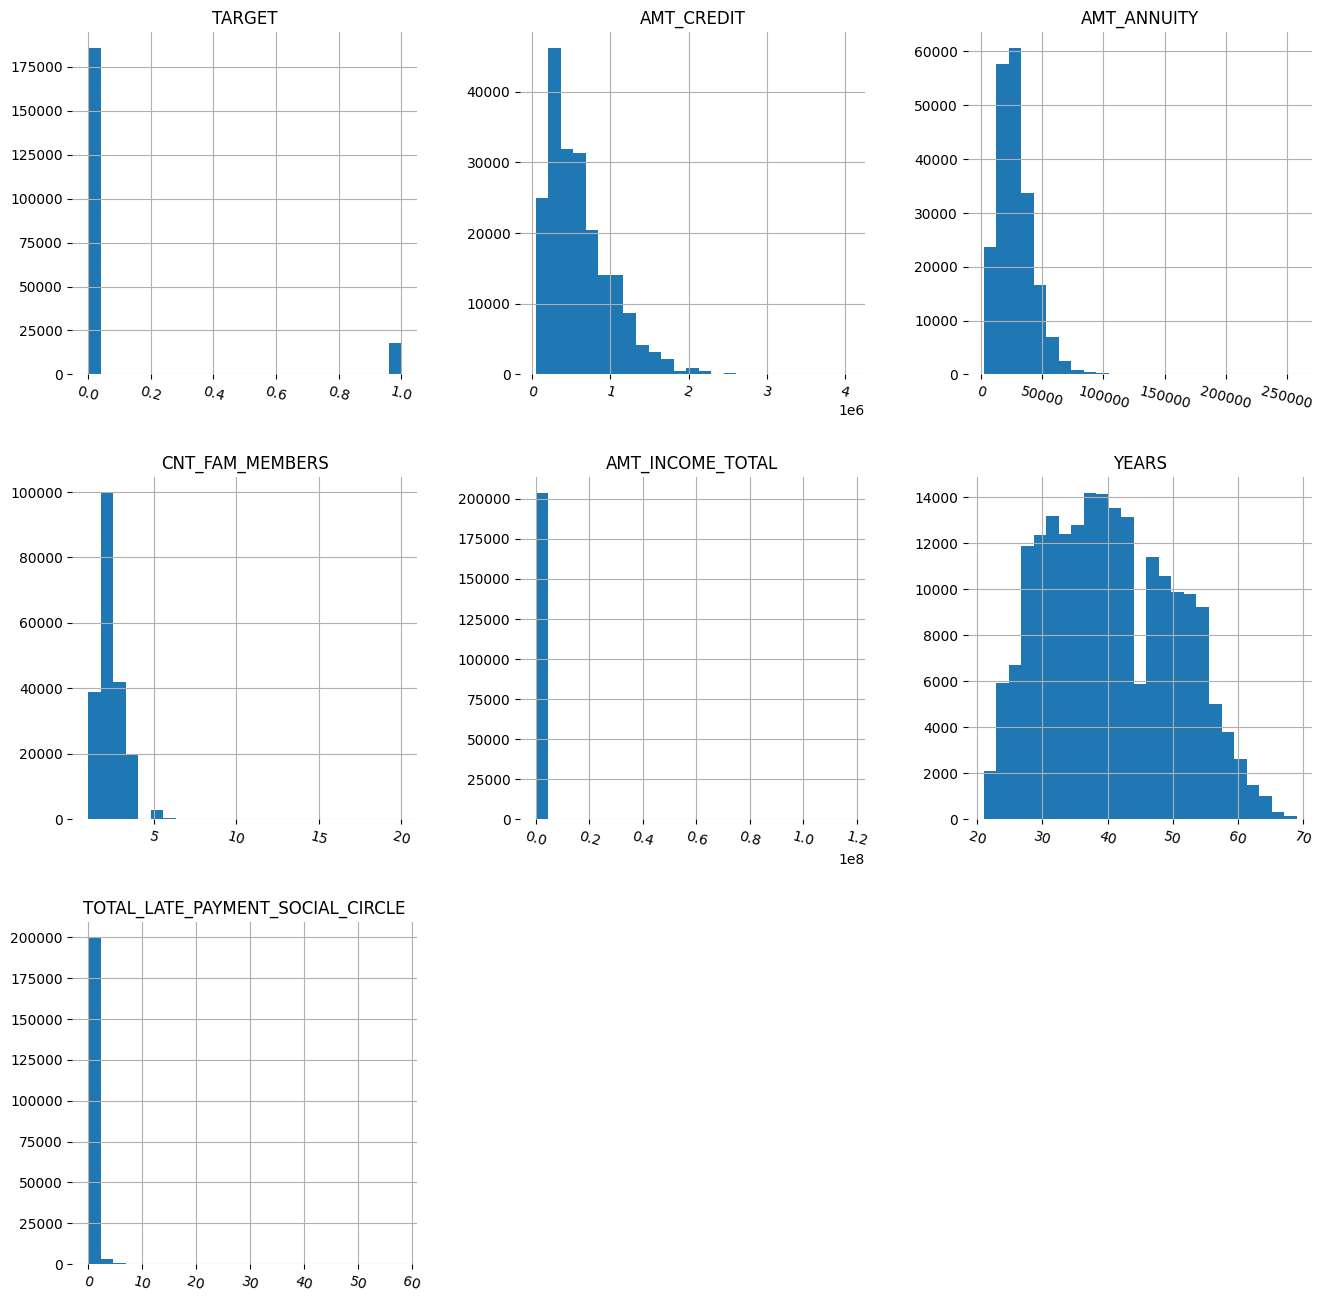

In [21]:
h = df_eda.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

In [22]:
num = list(df_eda.select_dtypes(include=[np.number]))

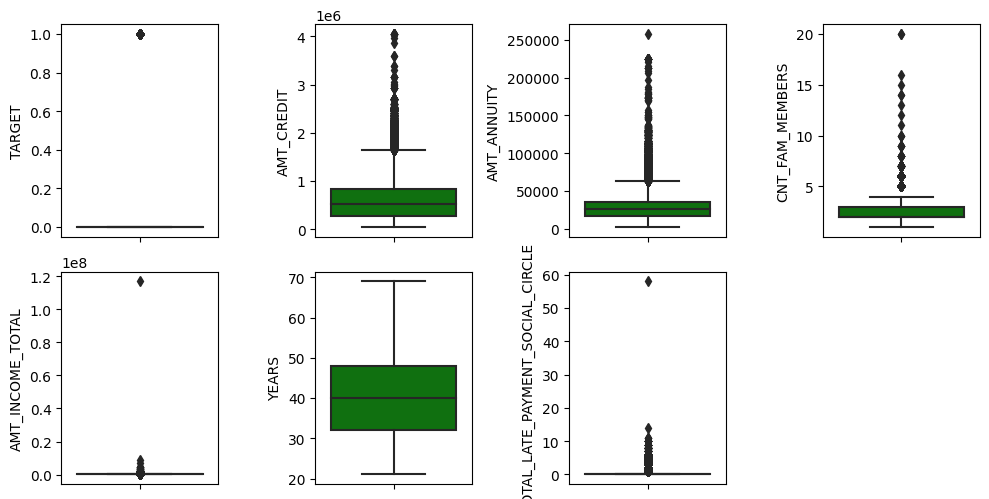

In [23]:
num_list = list(num)
plt.figure(figsize=(10, 10))
for i in range(0, len(num_list)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df_eda[num_list[i]],color='green',orient='v')
    plt.tight_layout()

In [24]:
data_mulin = df_eda.copy()

In [25]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

data_mulin['NAME_CONTRACT_TYPE'] = label.fit_transform(data_mulin['NAME_CONTRACT_TYPE'])
data_mulin['CODE_GENDER'] = label.fit_transform(data_mulin['CODE_GENDER'])
data_mulin['FLAG_OWN_CAR'] = label.fit_transform(data_mulin['FLAG_OWN_CAR'])
data_mulin['FLAG_OWN_REALTY'] = label.fit_transform(data_mulin['FLAG_OWN_REALTY'])
data_mulin['NAME_HOUSING_TYPE'] = label.fit_transform(data_mulin['NAME_HOUSING_TYPE'])
data_mulin['NAME_FAMILY_STATUS'] = label.fit_transform(data_mulin['NAME_FAMILY_STATUS'])
data_mulin['NAME_INCOME_TYPE'] = label.fit_transform(data_mulin['NAME_INCOME_TYPE'])
data_mulin['OCCUPATION_TYPE'] = label.fit_transform(data_mulin['OCCUPATION_TYPE'])
data_mulin['NAME_EDUCATION_TYPE'] = label.fit_transform(data_mulin['NAME_EDUCATION_TYPE'])
data_mulin['FLAG_TARGET'] = label.fit_transform(data_mulin['FLAG_TARGET'])

<ipython-input-26-b986c5f0285e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_mulin.corr()


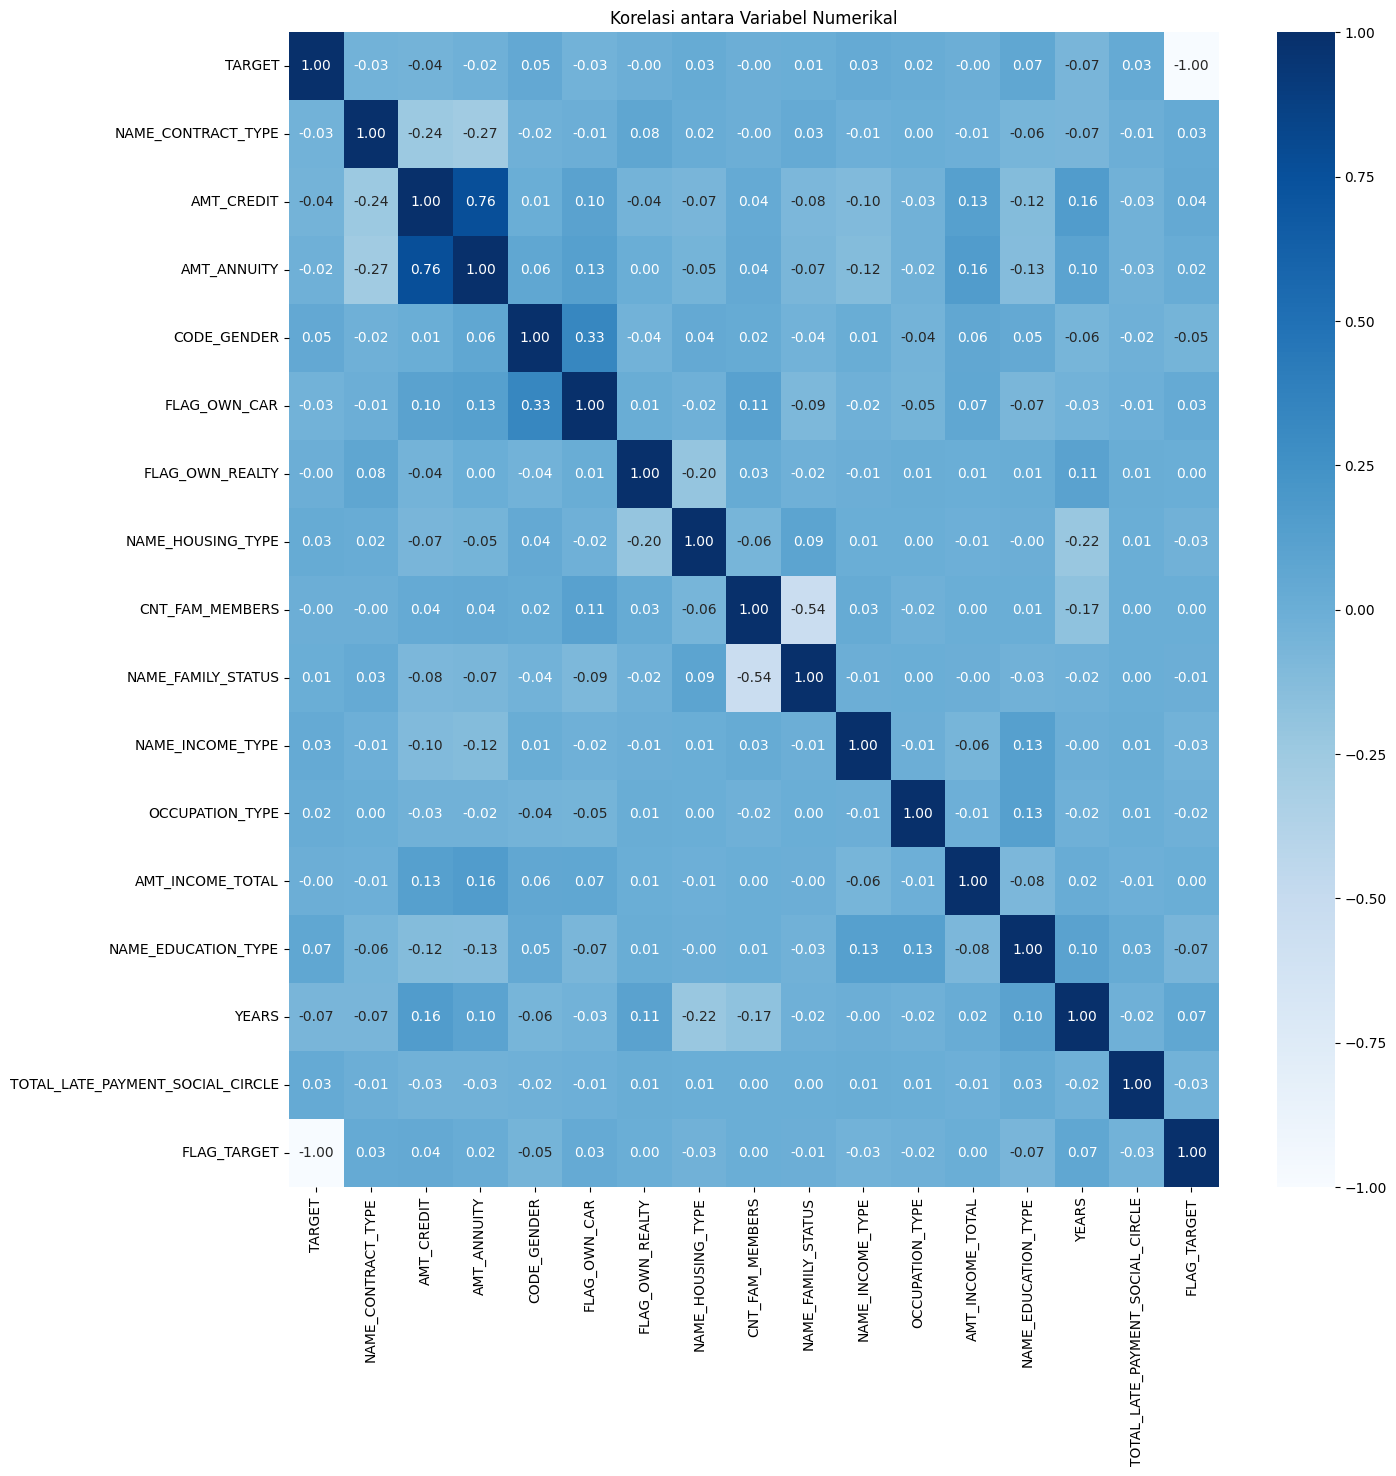

In [26]:
correlation_matrix = data_mulin.corr()
plt.figure(figsize=(15, 15))  # Ukuran heatmap diperbesar
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title("Korelasi antara Variabel Numerikal")
plt.show()

# MODELLING

In [27]:
model_data = df_eda.copy()
data_test = application_test_fix.copy()

**LABEL ENCODING**

In [28]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

model_data['NAME_CONTRACT_TYPE'] = label.fit_transform(model_data['NAME_CONTRACT_TYPE'])
model_data['CODE_GENDER'] = label.fit_transform(model_data['CODE_GENDER'])
model_data['FLAG_OWN_CAR'] = label.fit_transform(model_data['FLAG_OWN_CAR'])
model_data['FLAG_OWN_REALTY'] = label.fit_transform(model_data['FLAG_OWN_REALTY'])
model_data['NAME_HOUSING_TYPE'] = label.fit_transform(model_data['NAME_HOUSING_TYPE'])
model_data['NAME_FAMILY_STATUS'] = label.fit_transform(model_data['NAME_FAMILY_STATUS'])
model_data['NAME_INCOME_TYPE'] = label.fit_transform(model_data['NAME_INCOME_TYPE'])
model_data['OCCUPATION_TYPE'] = label.fit_transform(model_data['OCCUPATION_TYPE'])
model_data['NAME_EDUCATION_TYPE'] = label.fit_transform(model_data['NAME_EDUCATION_TYPE'])


#data_test['NAME_CONTRACT_TYPE'] = label.fit_transform(data_test['NAME_CONTRACT_TYPE'])
#data_test['CODE_GENDER'] = label.fit_transform(data_test['CODE_GENDER'])
#data_test['FLAG_OWN_CAR'] = label.fit_transform(data_test['FLAG_OWN_CAR'])
#data_test['FLAG_OWN_REALTY'] = label.fit_transform(data_test['FLAG_OWN_REALTY'])
#data_test['NAME_HOUSING_TYPE'] = label.fit_transform(data_test['NAME_HOUSING_TYPE'])
#data_test['NAME_FAMILY_STATUS'] = label.fit_transform(data_test['NAME_FAMILY_STATUS'])
#data_test['NAME_INCOME_TYPE'] = label.fit_transform(data_test['NAME_INCOME_TYPE'])
#data_test['OCCUPATION_TYPE'] = label.fit_transform(data_test['OCCUPATION_TYPE'])
#data_test['NAME_EDUCATION_TYPE'] = label.fit_transform(data_test['NAME_EDUCATION_TYPE'])


In [29]:
X = model_data.drop(columns=['SK_ID_CURR','FLAG_TARGET','TARGET'])
y = model_data['TARGET']

**Class Imbalanced**

In [30]:
value_counts = model_data['TARGET'].value_counts(normalize=True)
value_counts

0    0.91191
1    0.08809
Name: TARGET, dtype: float64

In [31]:
class_0_count = value_counts[0]
class_1_count = value_counts[1]
class_ratio = class_1_count / class_0_count
class_ratio

0.09659930734622979

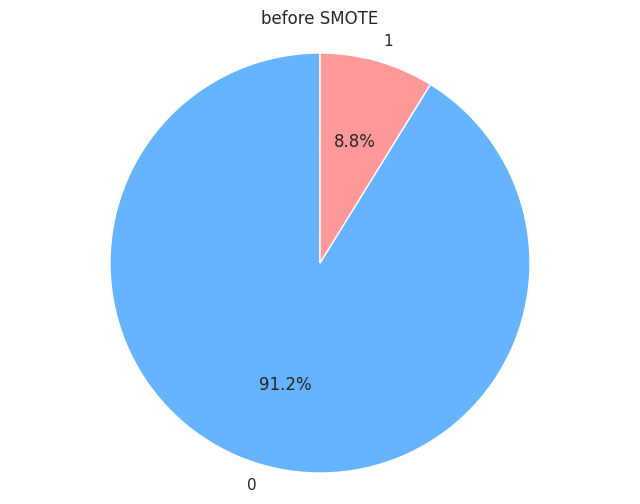

In [32]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
df_attrition = y.value_counts()
labels = df_attrition.index
plt.pie(df_attrition, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title("before SMOTE")
plt.axis('equal')
plt.show()

In [33]:
from imblearn.over_sampling import SMOTE

# Applying RandomOverSampler to address class imbalance
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_over, y_over = smote.fit_resample(X, y)

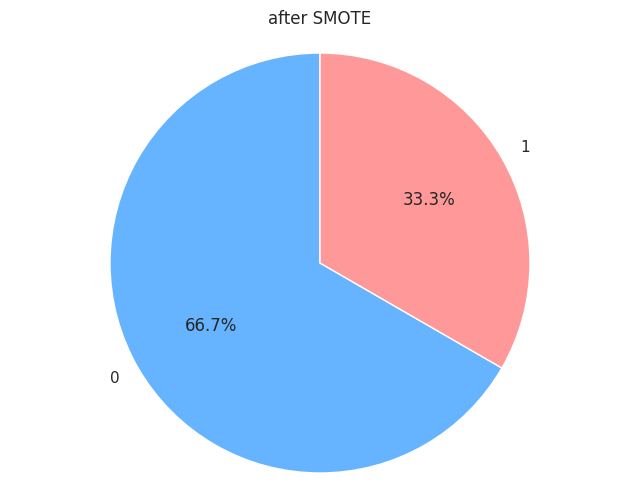

In [34]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
df_attrition = y_over.value_counts()
labels = df_attrition.index
plt.pie(df_attrition, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title("after SMOTE")
plt.axis('equal')
plt.show()

**Standarisasi Feature**

In [35]:
X = X_over
y = y_over

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
#X_test = data_test.drop(columns=['SK_ID_CURR'])

#X_test["YEARS"] = round(X_test["DAYS_BIRTH"] / (-365))
#X_test["TOTAL_LATE_PAYMENT_SOCIAL_CIRCLE"] = X_test["DEF_30_CNT_SOCIAL_CIRCLE"] + X_test["DEF_60_CNT_SOCIAL_CIRCLE"]
#X_test.drop(columns=['DAYS_BIRTH','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'], inplace=True)

In [38]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss_feature = X_train[['AMT_CREDIT','AMT_ANNUITY','AMT_INCOME_TOTAL','YEARS']]

for n in ss_feature:
  scaler = ss.fit(X_train[[n]])
  X_train[n] = scaler.transform(X_train[[n]])
  X_test[n] = scaler.transform(X_test[[n]])

In [39]:
model_data_train = pd.concat([X_train, y_train], axis = 1)

**Outlier Handling**

In [40]:
print(f'Number of rows before filtering outliers: {len(model_data_train)}')

fil_ent = np.array([True] * len(model_data_train))
for col in model_data_train :
    Q1 = model_data_train[col].quantile(0.25)
    Q3 = model_data_train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    fil_ent = ((model_data_train[col] >= low_limit) & (model_data_train[col] <= high_limit)) & fil_ent

dfa = model_data_train[fil_ent]

print('Number of rows after filtering outliers :', len(dfa))

Number of rows before filtering outliers: 194642
Number of rows after filtering outliers : 76731


The metric chosen for evaluation is Recall, which aims to minimize false negatives to ensure that identify as many at-risk customers to late payment as possible so it can take appropriate action to retain them.

In [41]:
X_train = model_data_train.drop(columns=['TARGET'])
y_train = model_data_train['TARGET']

In [42]:
#Perhatikan Models yang digunakan
#Perhatikan cv yang digunakan
#Karena Fokus di Recall, maka cv hanya perhitungkan Train dan Test di Recall

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix

def evaluate_models(X_train, y_train, X_test, y_test):
    results = []

    # List of models to evaluate
    models = [
        ("Gradient Boosting", GradientBoostingClassifier()),
        ("Random Forest", RandomForestClassifier()),
        ("Decision Trees", DecisionTreeClassifier()),
        ("XGBoost", xgb.XGBClassifier())
    ]

    for model_name, model in models:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_pred = model.predict(X_test)


        cf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10,6))
        sns.set(font_scale = 1.5)
        ax = sns.heatmap(cf_matrix, annot=True,fmt = 'd')
        plt.title('Confusion Matrix ' + model_name,fontsize=12)
        ax.set_xlabel('Predicted Values',fontsize=10)
        ax.set_ylabel('Actual Values',fontsize=10)
        plt.show()

        accuracy_train = round(accuracy_score(y_train, y_train_pred) * 100, 2)
        accuracy_test = round(accuracy_score(y_test, y_pred) * 100, 2)
        precision_train = round(precision_score(y_train, y_train_pred) * 100, 2)
        precision_test = round(precision_score(y_test, y_pred) * 100, 2)
        recall_train = round(recall_score(y_train, y_train_pred) * 100, 2)
        recall_test = round(recall_score(y_test, y_pred) * 100, 2)
        f1score_train = round(f1_score(y_train, y_train_pred) * 100, 2)
        f1score_test = round(f1_score(y_test, y_pred) * 100, 2)
        rocauc_train = round(roc_auc_score(y_train, y_train_pred) * 100, 2)
        rocauc_test = round(roc_auc_score(y_test, y_pred) * 100, 2)

        cv_scores = cross_validate(model, X_train, y_train, cv=5,
                                    scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'),
                                    return_train_score=True)

        mean_cv_accuracy = round(cv_scores['test_accuracy'].mean() * 100, 2)
        mean_cv_precision = round(cv_scores['test_precision'].mean() * 100, 2)
        mean_cv_recall_test = round(cv_scores['test_recall'].mean() * 100, 2)
        mean_cv_recall_train = round(cv_scores['train_recall'].mean() * 100, 2)
        mean_cv_f1 = round(cv_scores['test_f1'].mean() * 100, 2)
        mean_cv_roc_auc = round(cv_scores['test_roc_auc'].mean() * 100, 2)

        results.append([model_name, accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, f1score_train, f1score_test,
                        rocauc_train, rocauc_test, mean_cv_accuracy, mean_cv_precision, mean_cv_recall_test, mean_cv_recall_train, mean_cv_f1, mean_cv_roc_auc])

    results_df = pd.DataFrame(results, columns=["Model", "Accuracy Train (%)", "Accuracy Test (%)", "Precision Train (%)", "Precision Test (%)", "Recall Train (%)", "Recall Test (%)",
                                                 "F1 Score Train (%)", "F1 Score Test (%)", "ROC AUC Train (%)", "ROC AUC Test (%)", "CV Accuracy (%)", "CV Precision (%)", "CV Recall Test(%)" ,"CV Recall Train(%)", "CV F1 Score (%)", "CV ROC AUC (%)"])
    return results_df

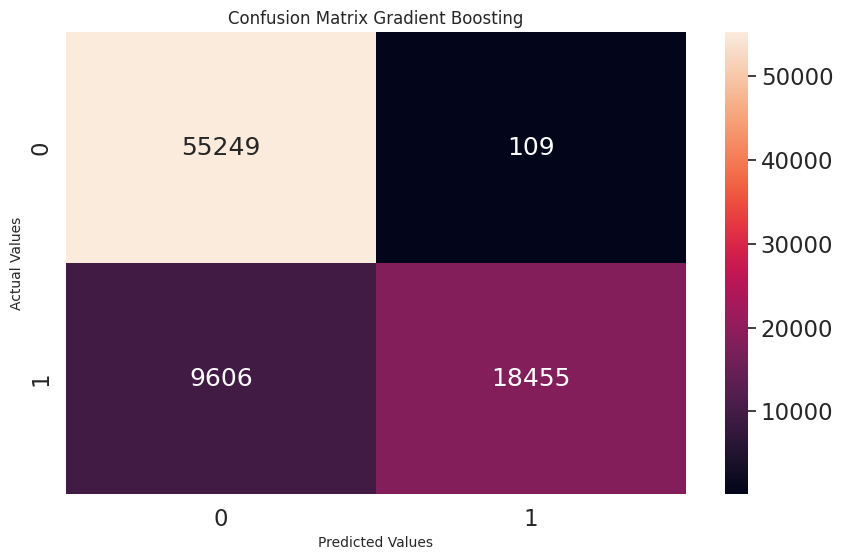

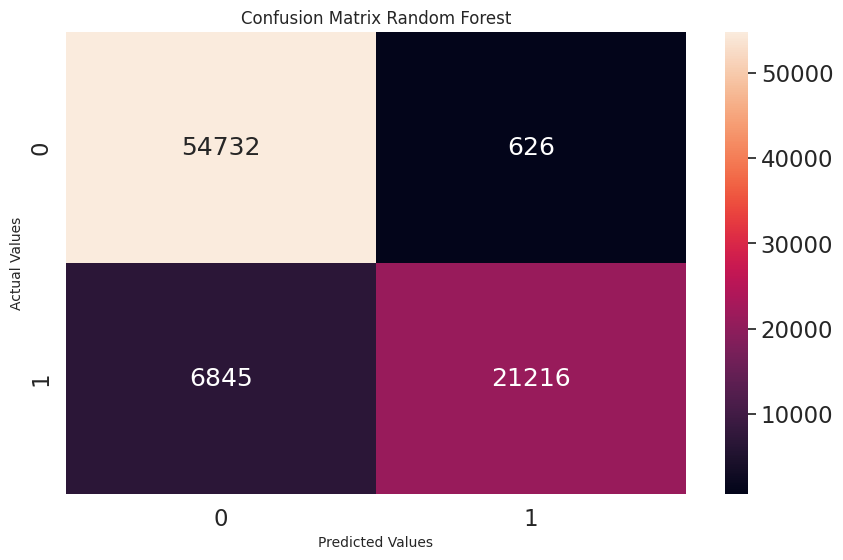

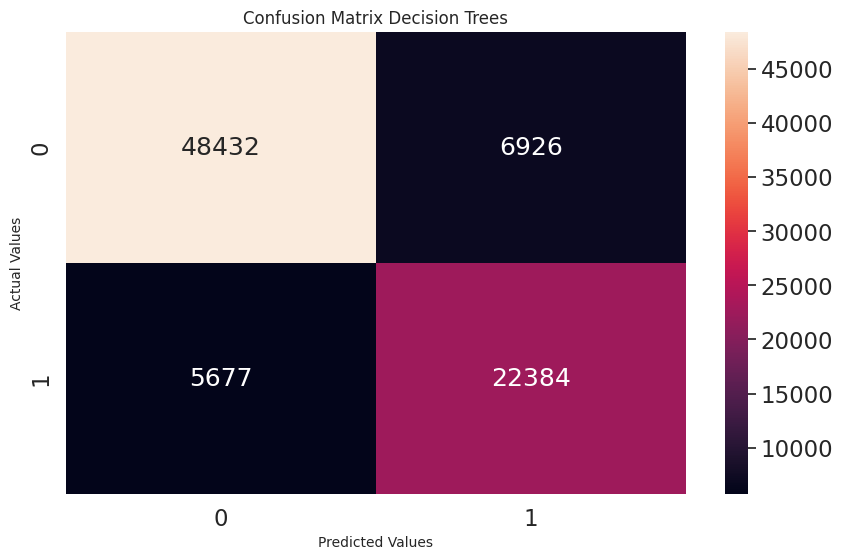

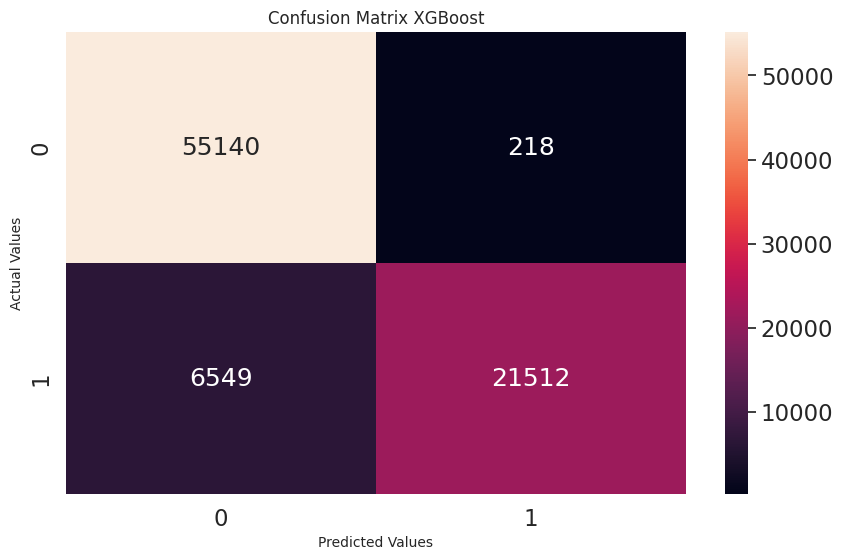

,Model,Accuracy Train (%),Accuracy Test (%),Precision Train (%),Precision Test (%),Recall Train (%),Recall Test (%),F1 Score Train (%),F1 Score Test (%),ROC AUC Train (%),ROC AUC Test (%),CV Accuracy (%),CV Precision (%),CV Recall Test(%),CV Recall Train(%),CV F1 Score (%),CV ROC AUC (%)
0,Gradient Boosting,88.49,88.35,99.32,99.41,65.80,65.77,79.16,79.16,82.79,82.79,88.63,99.37,66.18,66.22,79.44,90.10
1,Random Forest,99.99,91.04,100.00,97.13,99.97,75.61,99.98,85.03,99.99,87.24,90.67,96.67,74.47,99.98,84.13,92.39
2,Decision Trees,99.99,84.89,100.00,76.37,99.98,79.77,99.99,78.03,99.99,83.63,84.01,74.81,78.18,99.98,76.45,82.54
3,XGBoost,92.23,91.89,99.31,99.00,77.14,76.66,86.83,86.41,88.44,88.13,91.89,98.88,76.45,76.99,86.23,92.45


In [43]:
result = evaluate_models(X_train, y_train, X_test, y_test)
result

# Selected Model

Among the various machine learning models that have been explored, XGBoost has been selected as the top-performing model. Following this, hyperparameter tuning will be conducted after standardization to mitigate the risk of overfitting.

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model, ytest, pred):
    print('Accuracy(train): %.2f%%' % (accuracy_score(y_train, y_train_pred) * 100 ))
    print('Accuracy(test): %.2f%%' % (accuracy_score(y_test, y_pred) * 100 ))
    print('-----------'*5)
    print('Precision(train): %.2f%%' % (precision_score(y_train, y_train_pred) * 100))
    print('Precision(test): %.2f%%' % (precision_score(y_test, y_pred) * 100))
    print('-----------'*5)
    print('Recall(train): %.2f%%' % (recall_score(y_train, y_train_pred) * 100))
    print('Recall(test): %.2f%%' % (recall_score(y_test, y_pred) * 100))
    print('-----------'*5)
    print('F1_Score(train): %.2f%%' % (f1_score(y_train, y_train_pred) * 100))
    print('F1_Score(test): %.2f%%' % (f1_score(y_test, y_pred) * 100))
    print('-----------'*5)
    print("ROC AUC(train): %.2f%%" % (roc_auc_score(y_train, y_train_pred)*100))
    print("ROC AUC(test): %.2f%%" % (roc_auc_score(y_test, y_pred)*100))
    print('==========='*5)

def show_feature_importance(model):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [49]:
from xgboost import XGBClassifier

xg_tuned = XGBClassifier()
xg_tuned.fit(X_train, y_train)
y_pred = xg_tuned.predict(X_test)
y_train_pred = xg_tuned.predict(X_train)
eval_classification(xg_tuned,y_test,y_pred)

Accuracy(train): 92.23%
Accuracy(test): 91.89%
-------------------------------------------------------
Precision(train): 99.31%
Precision(test): 99.00%
-------------------------------------------------------
Recall(train): 77.14%
Recall(test): 76.66%
-------------------------------------------------------
F1_Score(train): 86.83%
F1_Score(test): 86.41%
-------------------------------------------------------
ROC AUC(train): 88.44%
ROC AUC(test): 88.13%


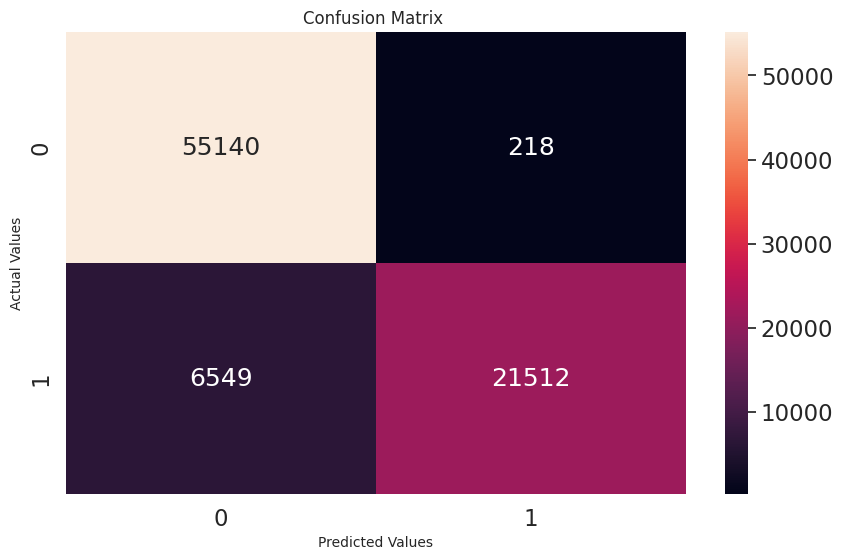

In [50]:
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.set(font_scale = 1.5)
ax = sns.heatmap(cf_matrix, annot=True,fmt = 'd')
plt.title('Confusion Matrix ',fontsize=12)
ax.set_xlabel('Predicted Values',fontsize=10)
ax.set_ylabel('Actual Values',fontsize=10)
plt.show()

**Feature Importance**

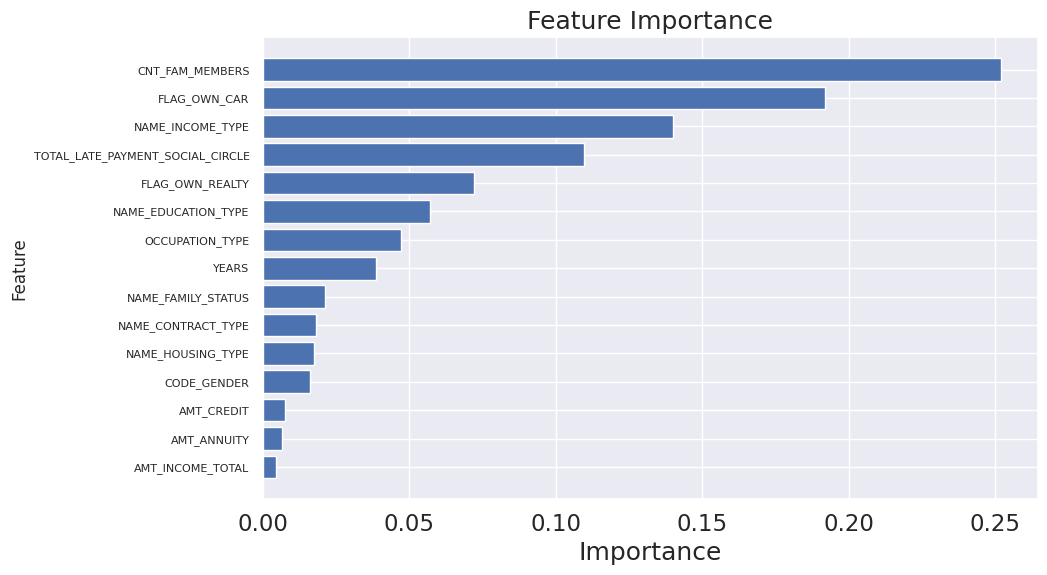

In [46]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Buat dan latih model XGBoost
xg_tuned = XGBClassifier()
xg_tuned.fit(X_train, y_train)

# Prediksi
y_pred = xg_tuned.predict(X_test)
y_train_pred = xg_tuned.predict(X_train)

# Tampilkan feature importance
feature_importance = xg_tuned.feature_importances_
feature_names = X_train.columns

# Buat dataframe untuk feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Buat grafik feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature',fontsize=12)
plt.yticks(fontsize=8)
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Untuk mengurutkan dari yang tertinggi ke terendah

plt.show()

# Business Simulation

**Preparing the data testing**

In [51]:
X_test = application_test_fix

In [53]:
X_test["YEARS"] = round(X_test["DAYS_BIRTH"] / (-365))
X_test["TOTAL_LATE_PAYMENT_SOCIAL_CIRCLE"] = X_test["DEF_30_CNT_SOCIAL_CIRCLE"] + X_test["DEF_60_CNT_SOCIAL_CIRCLE"]
X_test.drop(columns=['DAYS_BIRTH','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','SK_ID_CURR'], inplace=True)

<ipython-input-53-937bd949b6aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["YEARS"] = round(X_test["DAYS_BIRTH"] / (-365))
<ipython-input-53-937bd949b6aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["TOTAL_LATE_PAYMENT_SOCIAL_CIRCLE"] = X_test["DEF_30_CNT_SOCIAL_CIRCLE"] + X_test["DEF_60_CNT_SOCIAL_CIRCLE"]
<ipython-input-53-937bd949b6aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://panda

In [55]:
X_test['NAME_CONTRACT_TYPE'] = label.fit_transform(X_test['NAME_CONTRACT_TYPE'])
X_test['CODE_GENDER'] = label.fit_transform(X_test['CODE_GENDER'])
X_test['FLAG_OWN_CAR'] = label.fit_transform(X_test['FLAG_OWN_CAR'])
X_test['FLAG_OWN_REALTY'] = label.fit_transform(X_test['FLAG_OWN_REALTY'])
X_test['NAME_HOUSING_TYPE'] = label.fit_transform(X_test['NAME_HOUSING_TYPE'])
X_test['NAME_FAMILY_STATUS'] = label.fit_transform(X_test['NAME_FAMILY_STATUS'])
X_test['NAME_INCOME_TYPE'] = label.fit_transform(X_test['NAME_INCOME_TYPE'])
X_test['OCCUPATION_TYPE'] = label.fit_transform(X_test['OCCUPATION_TYPE'])
X_test['NAME_EDUCATION_TYPE'] = label.fit_transform(X_test['NAME_EDUCATION_TYPE'])

<ipython-input-55-7bd425a9d6c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['NAME_CONTRACT_TYPE'] = label.fit_transform(X_test['NAME_CONTRACT_TYPE'])
<ipython-input-55-7bd425a9d6c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['CODE_GENDER'] = label.fit_transform(X_test['CODE_GENDER'])
<ipython-input-55-7bd425a9d6c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [56]:
from xgboost import XGBClassifier

xg_tuned = XGBClassifier()
xg_tuned.fit(X_train, y_train)
y_pred = xg_tuned.predict(X_test)

In [58]:
X_test['y_pred'] = y_pred

<ipython-input-58-8fb24f67c636>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['y_pred'] = y_pred


,NAME_CONTRACT_TYPE,AMT_CREDIT,AMT_ANNUITY,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,NAME_FAMILY_STATUS,NAME_INCOME_TYPE,OCCUPATION_TYPE,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,YEARS,TOTAL_LATE_PAYMENT_SOCIAL_CIRCLE,y_pred
0,0,568800.0,20560.5,0,0,1,1,2.0,1,6,18,135000.0,1,53.0,0.0,0
1,0,222768.0,17370.0,1,0,1,1,2.0,1,6,9,99000.0,4,49.0,0.0,0
2,0,663264.0,69777.0,1,1,1,1,2.0,1,6,4,202500.0,1,55.0,0.0,0
3,0,1575000.0,49018.5,0,0,1,1,4.0,1,6,14,315000.0,4,38.0,0.0,0
4,0,625500.0,32067.0,1,1,0,1,3.0,1,6,18,180000.0,4,36.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0,412560.0,17473.5,0,0,1,1,1.0,4,6,18,121500.0,4,55.0,0.0,0
48740,0,622413.0,31909.5,0,0,0,1,4.0,1,1,14,157500.0,4,31.0,0.0,0
48741,0,315000.0,33205.5,0,1,1,1,3.0,1,1,18,202500.0,4,44.0,0.0,0
48742,0,450000.0,25128.0,1,0,0,1,2.0,1,1,10,225000.0,1,38.0,0.0,0


In [63]:
X_test_grup = X_test.groupby(['y_pred']).agg({
    'AMT_CREDIT': 'sum',
}).reset_index()
X_test_grup.columns = ['y_pred', 'sum_credit']

In [64]:
X_test_grup

,y_pred,sum_credit
0,0,2.303281e+10
1,1,2.155181e+09
